In [ ]:
import numpy as np #linear algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualisation
import seaborn as sns #data visualisation
from google.colab import drive
drive.mount('/content/drive')
!pip install dataprep
sns.set()

In [2]:
path = '/content/drive/My Drive/ML sem-5/fraud detection/data.csv'
# import data
data = pd.read_csv(path)

In [3]:
# display top 10 rows of data
data.head(10)

Time        V1        V2        V3  ...       V27       V28  Amount  Class
0   0.0 -1.359807 -0.072781  2.536347  ...  0.133558 -0.021053  149.62      0
1   0.0  1.191857  0.266151  0.166480  ... -0.008983  0.014724    2.69      0
2   1.0 -1.358354 -1.340163  1.773209  ... -0.055353 -0.059752  378.66      0
3   1.0 -0.966272 -0.185226  1.792993  ...  0.062723  0.061458  123.50      0
4   2.0 -1.158233  0.877737  1.548718  ...  0.219422  0.215153   69.99      0
5   2.0 -0.425966  0.960523  1.141109  ...  0.253844  0.081080    3.67      0
6   4.0  1.229658  0.141004  0.045371  ...  0.034507  0.005168    4.99      0
7   7.0 -0.644269  1.417964  1.074380  ... -1.206921 -1.085339   40.80      0
8   7.0 -0.894286  0.286157 -0.113192  ...  0.011747  0.142404   93.20      0
9   9.0 -0.338262  1.119593  1.044367  ...  0.246219  0.083076    3.68      0

[10 rows x 31 columns]

In [4]:
# number of rows and columns in dataset
print("Data has {} rows, {} columns".format(data.shape[0], data.shape[1]))

Data has 284807 rows, 31 columns


In [5]:
#number of nulls in dataset
print("Data has {} null values".format(data.isnull().any().sum()))

Data has 0 null values


In [8]:
# overview of statistics of data
data.describe()

Time            V1  ...         Amount          Class
count  284807.000000  2.848070e+05  ...  284807.000000  284807.000000
mean    94813.859575  3.919560e-15  ...      88.349619       0.001727
std     47488.145955  1.958696e+00  ...     250.120109       0.041527
min         0.000000 -5.640751e+01  ...       0.000000       0.000000
25%     54201.500000 -9.203734e-01  ...       5.600000       0.000000
50%     84692.000000  1.810880e-02  ...      22.000000       0.000000
75%    139320.500000  1.315642e+00  ...      77.165000       0.000000
max    172792.000000  2.454930e+00  ...   25691.160000       1.000000

[8 rows x 31 columns]

In [13]:
from sklearn import model_selection #train, test split

y = data['Class'] #target variable
X = data.drop('Class', axis = 1) #predictors
# split data into train (80%) and test(20%) set
Xtrain, Xtest, Ytrain, Ytest = model_selection.train_test_split(X, y, test_size = 0.2, random_state = 1)

In [14]:
from sklearn.preprocessing import StandardScaler #standardisation

scaler = StandardScaler() #scaler processor

Xtrain_scaled = scaler.fit_transform(Xtrain) #Standardize features by removing the mean and scaling to unit variance

In [24]:
from dataprep.eda import create_report #EDA report
Xtrain_scaledDF = pd.DataFrame(Xtrain_scaled, columns=Xtrain.columns)
report = create_report(Xtrain_scaledDF)

DataPrep Report
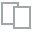
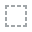
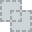
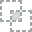
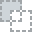
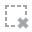
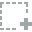
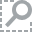
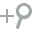
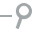
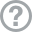
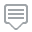
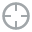
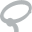
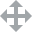
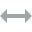
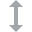
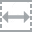
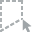
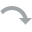
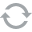
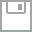
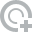
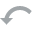
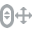
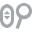
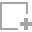
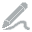
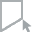
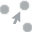
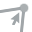
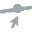

In [22]:
from IPython.core.display import display #for visualising report

display(report)


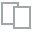
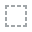
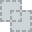
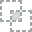
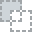
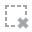
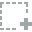
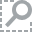
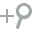
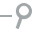
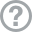
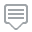
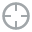
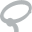
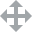
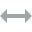
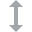
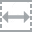
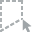
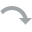
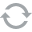
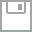
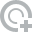
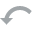
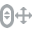
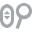
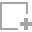
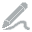
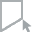
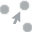
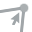
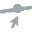

In [41]:
from dataprep.eda import plot #distribution plot

plot(Ytrain) #distribution of target variable


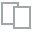
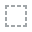
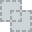
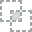
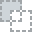
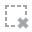
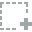
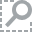
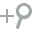
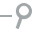
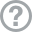
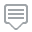
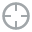
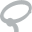
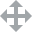
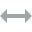
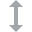
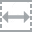
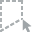
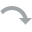
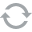
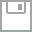
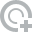
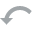
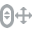
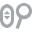
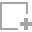
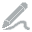
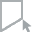
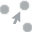
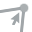
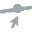

In [43]:
from dataprep.eda import plot_correlation #plot correlation b/w 2 variables

Xtrain_scaledDF1 = Xtrain_scaledDF.copy() #copy of Xtrain_scaled dataframe
Xtrain_scaledDF1['y'] = Ytrain.values #append column y of target variable values

plot_correlation(Xtrain_scaledDF1, 'y') #display correlation plot b/w predictors and target

In [45]:
Xtrain_scaledDF

Time        V1        V2  ...       V27       V28    Amount
0      -1.501312  0.708095 -0.333092  ... -0.237366 -0.046219 -0.228536
1      -1.229425  0.521398 -0.118794  ...  0.224916  0.104727 -0.188612
2      -0.724899 -0.577153  0.384665  ...  0.141346  0.303791 -0.260989
3      -1.844720 -0.432875  0.036380  ... -0.216605  0.225137 -0.173711
4       0.426312 -0.019559  0.329297  ...  0.624137  0.863256 -0.314930
...          ...       ...       ...  ...       ...       ...       ...
227840 -1.331599 -1.521167 -5.250514  ... -0.941919  1.198326  8.932678
227841 -0.424403  0.478541 -0.515984  ... -0.147759  0.068514  0.333650
227842 -0.838027 -0.585057  1.026667  ... -0.398610  0.090565 -0.324008
227843  1.429445  0.895139 -0.424936  ... -0.014022 -0.060409  0.026309
227844 -0.343360 -0.359638  0.297697  ... -0.949027 -0.612925 -0.122300

[227845 rows x 30 columns]